## **DataFrames**

DataFrame is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet or SQL table, or a dict of Series objects. It is generally the most commonly used pandas object.

Like Series, DataFrame accepts many different kinds of input:

* Dict of 1D ndarrays, lists, dicts, or Series
* 2-D numpy.ndarray
* Structured or record ndarray
* A Series
* Another DataFrame

Along with the data, you can optionally pass `index` (row labels) and `columns` (column labels) arguments. 

In [1]:
import pandas as pd
import numpy as np

In [2]:
from numpy.random import randn
np.random.seed(101)

In [3]:
#dataframe from ndarrays

df = pd.DataFrame(randn(5,4),index='A B C D E'.split(),columns='W X Y Z'.split())

In [4]:
df

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057
E,0.190794,1.978757,2.605967,0.683509


## Selection and Indexing

Various methods to grab data from a DataFrame

In [5]:
#Notice: selects columns not index

df['W']

A    2.706850
B    0.651118
C   -2.018168
D    0.188695
E    0.190794
Name: W, dtype: float64

In [6]:
# For selecting two or more columns: use list

df[['W','Z']]

,W,Z
A,2.706850,0.503826
B,0.651118,0.605965
C,-2.018168,-0.589001
D,0.188695,0.955057
E,0.190794,0.683509


In [7]:
# SQL Syntax (NOT RECOMMENDED!)
df.W

A    2.706850
B    0.651118
C   -2.018168
D    0.188695
E    0.190794
Name: W, dtype: float64

DataFrame Columns are just Series

In [8]:
type(df['W'])

pandas.core.series.Series

### **Creating a new column:**

In [9]:
df['new'] = df['W'] + df['Y']

In [10]:
df

,W,X,Y,Z,new
A,2.706850,0.628133,0.907969,0.503826,3.614819
B,0.651118,-0.319318,-0.848077,0.605965,-0.196959
C,-2.018168,0.740122,0.528813,-0.589001,-1.489355
D,0.188695,-0.758872,-0.933237,0.955057,-0.744542
E,0.190794,1.978757,2.605967,0.683509,2.796762


### **Removing Columns**

In [11]:
df.drop('new',axis=1)

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057
E,0.190794,1.978757,2.605967,0.683509


In [12]:
# Notice: Not removed inplace unless specified!
df

,W,X,Y,Z,new
A,2.706850,0.628133,0.907969,0.503826,3.614819
B,0.651118,-0.319318,-0.848077,0.605965,-0.196959
C,-2.018168,0.740122,0.528813,-0.589001,-1.489355
D,0.188695,-0.758872,-0.933237,0.955057,-0.744542
E,0.190794,1.978757,2.605967,0.683509,2.796762


In [13]:
# remove inplace
df.drop('new',axis=1,inplace=True)

In [14]:
df

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057
E,0.190794,1.978757,2.605967,0.683509


Can also drop rows this way:

In [15]:
df.drop('E',axis=0)  #not inplace

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057


### **Selecting Rows**

In [16]:
#Explicit index
df.loc['A']

W    2.706850
X    0.628133
Y    0.907969
Z    0.503826
Name: A, dtype: float64

In [17]:
#Implicit index
df.iloc[2]

W   -2.018168
X    0.740122
Y    0.528813
Z   -0.589001
Name: C, dtype: float64

### **Selecting subset of rows and columns**

In [18]:
#loc[index,column] : [row,column] : similar to numpy

df.loc['B','Y']

-0.8480769834036315

In [19]:
df.loc[['A','B'],['W','Y']]

,W,Y
A,2.706850,0.907969
B,0.651118,-0.848077


### Conditional Selection

An important feature of pandas is conditional selection using bracket notation, very similar to numpy:

In [20]:
df

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057
E,0.190794,1.978757,2.605967,0.683509


In [21]:
df>0

,W,X,Y,Z
A,True,True,True,True
B,True,False,False,True
C,False,True,True,False
D,True,False,False,True
E,True,True,True,True


In [22]:
df[df>0]

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,NaN,NaN,0.605965
C,NaN,0.740122,0.528813,NaN
D,0.188695,NaN,NaN,0.955057
E,0.190794,1.978757,2.605967,0.683509


In [23]:
df['W']>0

A     True
B     True
C    False
D     True
E     True
Name: W, dtype: bool

In [24]:
df[df['W']>0]

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
D,0.188695,-0.758872,-0.933237,0.955057
E,0.190794,1.978757,2.605967,0.683509


In [25]:
df[df['W']>0]['Y']

A    0.907969
B   -0.848077
D   -0.933237
E    2.605967
Name: Y, dtype: float64

In [26]:
df[df['W']>0][['Y','X']]

,Y,X
A,0.907969,0.628133
B,-0.848077,-0.319318
D,-0.933237,-0.758872
E,2.605967,1.978757


For two conditions you can use | and & with parenthesis:

In [27]:
df[(df['W']>0) & (df['Y'] > 1)]

,W,X,Y,Z
E,0.190794,1.978757,2.605967,0.683509


## More Index Details

Let's discuss some more features of indexing, including resetting the index or setting it something else. We'll also talk about index hierarchy!

In [28]:
df

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057
E,0.190794,1.978757,2.605967,0.683509


In [29]:
# Reset to default 0,1...n index
df.reset_index()

,index,W,X,Y,Z
0,A,2.706850,0.628133,0.907969,0.503826
1,B,0.651118,-0.319318,-0.848077,0.605965
2,C,-2.018168,0.740122,0.528813,-0.589001
3,D,0.188695,-0.758872,-0.933237,0.955057
4,E,0.190794,1.978757,2.605967,0.683509


In [30]:
new_index = 'N E P A L'.split(' ')

In [31]:
new_index

['N', 'E', 'P', 'A', 'L']

In [32]:
df['index'] = new_index

In [33]:
df.set_index('index')

,W,X,Y,Z
index,,,,
N,2.706850,0.628133,0.907969,0.503826
E,0.651118,-0.319318,-0.848077,0.605965
P,-2.018168,0.740122,0.528813,-0.589001
A,0.188695,-0.758872,-0.933237,0.955057
L,0.190794,1.978757,2.605967,0.683509


In [34]:
df

,W,X,Y,Z,index
A,2.706850,0.628133,0.907969,0.503826,N
B,0.651118,-0.319318,-0.848077,0.605965,E
C,-2.018168,0.740122,0.528813,-0.589001,P
D,0.188695,-0.758872,-0.933237,0.955057,A
E,0.190794,1.978757,2.605967,0.683509,L


In [35]:
# set index inplace

df.set_index('index',inplace = True)

In [36]:
df

,W,X,Y,Z
index,,,,
N,2.706850,0.628133,0.907969,0.503826
E,0.651118,-0.319318,-0.848077,0.605965
P,-2.018168,0.740122,0.528813,-0.589001
A,0.188695,-0.758872,-0.933237,0.955057
L,0.190794,1.978757,2.605967,0.683509


## Example: Visual Guide

One of the easiest ways to think about that, is that you can load tables (and excel files) and then slice and dice them in multiple ways:

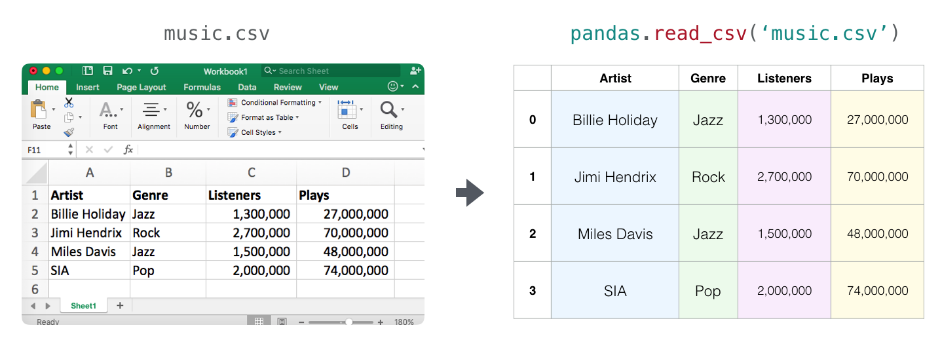

In [37]:
l = [["Billie Holiday",'Jazz',1300000,27000000],
    ['Jimi Hendrix','Rock',2700000,70000000],
    ['Miles Davis','Jazz',1500000,48000000],
    ['SIA','Pop',2000000,74000000]]

In [38]:
columns = ['Artist','Genre','Listeners','Plays']

In [39]:
df = pd.DataFrame(l,columns=columns)

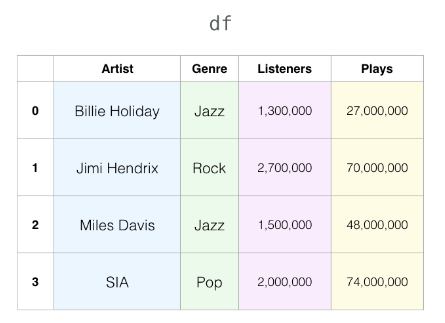

In [40]:
df

,Artist,Genre,Listeners,Plays
0,Billie Holiday,Jazz,1300000,27000000
1,Jimi Hendrix,Rock,2700000,70000000
2,Miles Davis,Jazz,1500000,48000000
3,SIA,Pop,2000000,74000000


### Selection

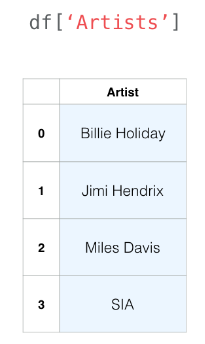

In [41]:
df['Artist']

0    Billie Holiday
1      Jimi Hendrix
2       Miles Davis
3               SIA
Name: Artist, dtype: object

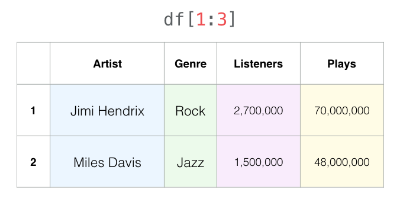

In [42]:
df[1:3]

,Artist,Genre,Listeners,Plays
1,Jimi Hendrix,Rock,2700000,70000000
2,Miles Davis,Jazz,1500000,48000000


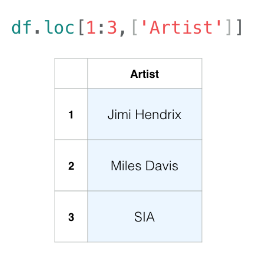

In [43]:
df.loc[1:3,['Artist']]

,Artist
1,Jimi Hendrix
2,Miles Davis
3,SIA


### Filtering

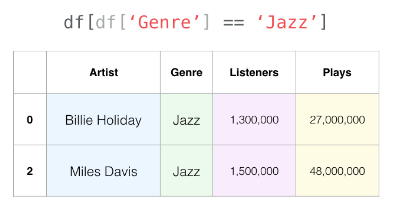

In [44]:
df['Genre']

0    Jazz
1    Rock
2    Jazz
3     Pop
Name: Genre, dtype: object

In [45]:
# our Jazz musicians
df['Genre'] == 'Jazz'

0     True
1    False
2     True
3    False
Name: Genre, dtype: bool

In [46]:
df[df['Genre'] == 'Jazz']

,Artist,Genre,Listeners,Plays
0,Billie Holiday,Jazz,1300000,27000000
2,Miles Davis,Jazz,1500000,48000000


 Artists who have more than 1,800,000 listeners:

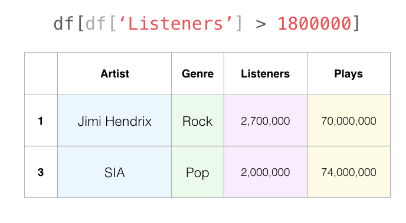

In [47]:
df['Listeners']>1800000

0    False
1     True
2    False
3     True
Name: Listeners, dtype: bool

In [48]:
df[df['Listeners']>1800000]

,Artist,Genre,Listeners,Plays
1,Jimi Hendrix,Rock,2700000,70000000
3,SIA,Pop,2000000,74000000
